Methods:
- Data Cleaning
  - Handling Missing values
    - Drop samples having missing values
    - Replace missing values with zero
    - Replace missing values with mean/median/mode
    - Use backward/forward fill approach
    - Use interpolation to fill values between cells
  - Outliers treatment
  - Removal of duplicate data
- Dimensionality Reduction (Feature reduction)
- Normalization
  - Min-max scaler (to shrink the values to any range of choice)
  - Standard scaler (to scale down to mean=0 and std=1)
- Feature Encoding
  - Label encoding/Ordinal encoding (for ordinal/ordered data (e.g., grades))
  - One hot encoding (for nominal/unordered data, (e.g., cities))
- Imbalanced data treatment (unequal distribution of classes)
  - Oversampling
  - Undersampling
 

### Data Preprocessing

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [141]:
df.shape

(891, 12)

In [142]:
df.columns

Index(['PassengerId', 'Name', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [143]:
df.dtypes

PassengerId      int64
Name            object
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Survived         int64
dtype: object

In [144]:
df[:1]

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.25,NaN,S,0


Dropping irrevelant columns

In [145]:
df.drop(["PassengerId", "Name", "Ticket"], inplace=True, axis="columns")
df[:1]

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,3,male,22.0,1,0,7.25,NaN,S,0


Handling missing values

In [146]:
df.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
Survived      0
dtype: int64

In [147]:
df.drop("Cabin", axis="columns", inplace=True)
df.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Survived      0
dtype: int64

In [148]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [149]:
df.Embarked = df.Embarked.fillna('S')
df.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
Survived      0
dtype: int64

In [150]:
df["Age"] = df["Age"].fillna(df["Age"].mean())
df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

Outlier detection

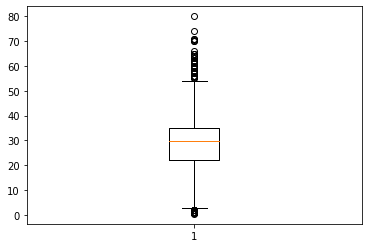

In [151]:
plt.boxplot(df.Age.values)
plt.show()

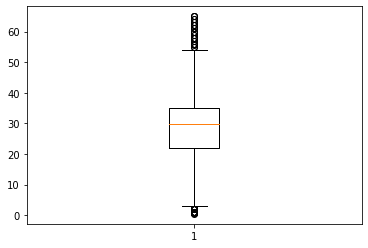

In [152]:
df = df[df.Age <= 65]
plt.boxplot(df.Age.values)
plt.show()

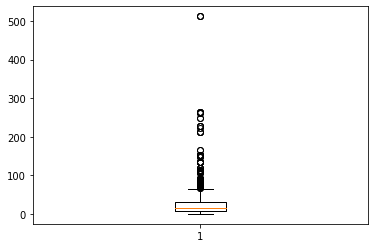

In [153]:
plt.boxplot(df.Fare.values)
plt.show()

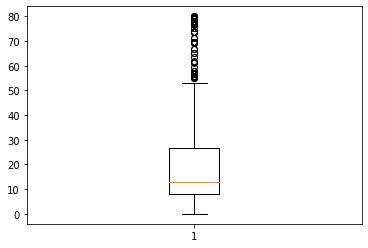

In [154]:
df = df[df.Fare <= 80]
plt.boxplot(df.Fare.values)
plt.show()

In [155]:
df.shape

(809, 8)

Feature Encoding

In [156]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


In [157]:
df.Sex.value_counts()

male      543
female    266
Name: Sex, dtype: int64

In [158]:
df.Embarked.value_counts()

S    607
C    128
Q     74
Name: Embarked, dtype: int64

In [159]:
dummies = pd.get_dummies(df[["Sex", "Embarked"]])
df = pd.concat([df,dummies], axis="columns")
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,male,22.0,1,0,7.2500,S,0,0,1,0,0,1
1,1,female,38.0,1,0,71.2833,C,1,1,0,1,0,0
2,3,female,26.0,0,0,7.9250,S,1,1,0,0,0,1
3,1,female,35.0,1,0,53.1000,S,1,1,0,0,0,1
4,3,male,35.0,0,0,8.0500,S,0,0,1,0,0,1


In [160]:
df.drop(["Sex", "Sex_female", "Embarked", "Embarked_Q"], axis="columns", inplace=True)
df.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_male,Embarked_C,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,1,0
2,3,26.0,0,0,7.9250,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,1


Standardization

In [161]:
from sklearn.preprocessing import StandardScaler
for column in ["Age", "Fare"]:
  sc = StandardScaler()
  df[column] = sc.fit_transform(df[column].values.reshape(-1,1))

df.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_male,Embarked_C,Embarked_S
0,3,-0.573935,1,0,-0.737327,0,1,0,1
1,1,0.726071,1,0,2.778225,1,0,1,0
2,3,-0.248933,0,0,-0.700268,1,0,0,1
3,1,0.482320,1,0,1.779926,1,0,0,1
4,3,0.482320,0,0,-0.693405,0,1,0,1
